## Gap Statistic

When determining the optimal number of clusters, typically the within-in cluster dissimilarity ($W_{k}$) is examined as function of the number of clusters. The value of $W_{k}$ usually decreases as more clusters are added. *Tibshirani et al* proposed one technique of determining the number of clusters, called the Gap Statistic. This is equal to the difference between the observed and expected values of $log(W_{k})$. In summary, the Gap Statistic compares the pairwise distances between samples in a cluster with that expected under a null hypothesis (i.e. sampled many times from uniform distribution in order to get the expected null dispersion). In order to determine the optimal number of clusters, the 'Nth' cluster where the gap between the two curves is largest will be chosen. 

$$Gap_{n}(k) = E_{n}^{*}{log(W_{k})} - log(W_{k})$$

In [ ]:
import pandas as pd
import numpy as np
from sklearn.datasets import make_blobs,make_moons
from sklearn.cluster import KMeans

import matplotlib.pyplot as plt
%matplotlib inline

======== Gap Statistic ========
Optimal Cluster: 3
    Cluster       Gap   Expected
0       1.0 -1.178555  66.989533
1       2.0 -0.928180  40.541454
2       3.0 -0.642408  25.287570
3       4.0 -0.884179  16.588839
4       5.0 -0.928261  13.538604
5       6.0 -0.937186  11.325884
6       7.0 -0.963210   9.445238
7       8.0 -0.983421   7.995592
8       9.0 -1.022152   6.992560
9      10.0 -1.012918   6.242804
10     11.0 -1.008907   5.685895
11     12.0 -1.006805   5.179686
12     13.0 -1.002571   4.677881
13     14.0 -0.981097   4.354338


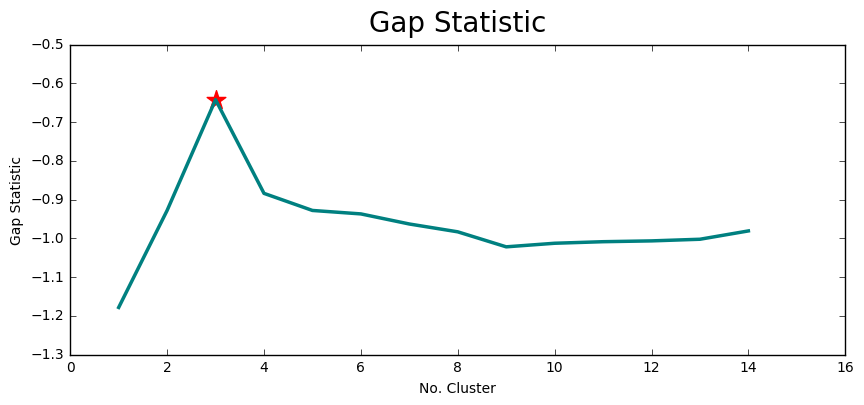

In [77]:
class Gap_Statistic():
    
    def __init__(self,max_clusters,iterations):
        
        #Max number of clusters to test
        self.max_clusters = max_clusters
        
        #Max iterations
        self.iter = iterations
        
    @staticmethod
    def expected_dispersion(cluster,X):
        
        """
        Return the expected dispersion from random sample with uniform distribution 
        
        Keyword argument:
        X -- input features array
        """
        
        #Draw Random Sample
        random_sample = np.random.random_sample(X.shape)

        #KMeans
        try:
            km = KMeans(cluster,init='k-means++')
            km.fit(random_sample)
        
        except Exception as e:
            print(str(e))

        return(km.inertia_)
    
    def optimal_cluster(self,X):
        
        """
        Apply Gap Statistic and Return Optimal Number of Clusters 
        
        Keyword argument:
        X -- input features array
        """
        
        print('======== Gap Statistic ========')
        
        #Set up holders for results
        gap_stat = np.zeros(len(range(1,self.max_clusters)))
        results = pd.DataFrame(columns={'Gap','Expected','Cluster'})
    
        for idx, cluster in enumerate(range(1,self.max_clusters)):

            #Null Hypothesis -- Dispersion
            null_disp = np.zeros(self.iter)
            
            #Apply Monte Carlo to obtain expected dispersion 
            for i in range(self.iter):
                null_disp[i] = Gap_Statistic.expected_dispersion(cluster,X)
            
            #Kmeans
            try:
                #Fit to original Data
                km = KMeans(cluster,init='k-means++')
                km.fit(X)
                
            except Exception as e:
                print(str(e))
            
            #Calculate Gap Statistic: Log(expected_val - log(dispersion))
            gap = np.log(np.mean(null_disp)) - np.log(km.inertia_)
            
            #Store Gap Statistic -- optimal 'K'
            gap_stat[idx] = gap
            
            #Append Results
            results = results.append({'Gap':gap,'Expected':np.mean(null_disp),'Cluster':cluster},ignore_index=True)

        opt_cluster = np.argmax(gap_stat) + 1

        print('Optimal Cluster: %.0f'% opt_cluster)
        print(results)
        
        return(opt_cluster,results)

    def optimal_clust_visual(self,cluster,results):
        
        fig = plt.figure(figsize=(10,4))
        ax = fig.add_subplot(111)
            
        row = results[results['Cluster'] == cluster]
        ax.scatter(x=row.Cluster.values,y=row.Gap.values,marker='*',s=200,color='r')
        
        ax.plot(results.Cluster,results.Gap,color='teal',lw=2.5)
        ax.set_ylabel('Gap Statistic')
        ax.set_xlabel('No. Cluster')
        ax.set_title('Gap Statistic',fontsize=20,y=1.02)
    

if __name__ == '__main__':
   
    gap = Gap_Statistic(15,30)
    
    #Compute Gap Statistic
    out = gap.optimal_cluster(X[0])
    
    #Visualization of optimal number of clusters
    gap.optimal_clust_visual(out[0],out[1])
    